# 권역별(공간적) 재난지원금 주요 사용처 분석

기본적으로 공간적(권역별)로 재난지원금이 얼마나 사용되었는지 어디에 주로 사용되었는지 살펴볼 필요성이 있다. 이를 분석한 뒤에 지리적 특성, 그리고 권역에 따른 특성에 대입하여 살펴볼 필요가 있다. 이를 최종적으로 재난지원금이 적절한 곳에 사용되었는지와 연관시켜볼 수 있다. 이를 위해서는 추후에 권역별로 어떤 상업이 발달했는지 분석하고, 재난지원금 목적의 대상이 되는 상업과 연관이 있는지 살펴볼 필요가 있다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_05_01 = pd.read_csv("./data/KRI-DAC_Jeju_data6_dong_1_90000.csv")
data_05_02 = pd.read_csv("./data/KRI-DAC_Jeju_data6_dong_90000_189000.csv")

In [3]:
data = pd.concat([data_05_01, data_05_02])
data = data.reset_index(drop=True)
data.head()

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG
0,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00시,1520000,0,8,0,126.178884,33.302766,한경면
1,2,3,3,202006,제주특별자치도,제주시,중소1,편의점,00시,482310,0,35,0,126.179458,33.300971,한경면
2,3,4,4,202006,제주특별자치도,제주시,영세,편의점,00시,38050,5450,3,1,126.179430,33.302323,한경면
3,4,5,5,202006,제주특별자치도,제주시,영세,일반한식,00시,32000,32000,1,1,126.179412,33.303224,한경면
4,5,6,6,202006,제주특별자치도,제주시,영세,주점,00시,99000,0,1,0,126.179412,33.303224,한경면


In [4]:
data["DONG"].unique()

array(['한경면', '한림읍', '대정읍', '안덕면', '애월읍', '추자면', '하예동', '상예동', '색달동',
       '중문동', '외도이동', '대포동', '외도일동', '내도동', '도평동', '하원동', '해안동', '이호일동',
       '이호이동', '월평동', '도두일동', '노형동', '도순동', '도두이동', '강정동', '연동', '용담삼동',
       '용담이동', '오라삼동', '오라이동', '법환동', '서호동', '용담일동', '오라일동', '삼도일동',
       '삼도이동', '오등동', '호근동', '도남동', '이도일동', '일도일동', '건입동', '이도이동', '일도이동',
       '아라일동', '아라이동', '서홍동', '서귀동', '동홍동', '화북이동', '화북일동', '영평동', '토평동',
       '삼양삼동', '도련일동', '삼양이동', '봉개동', '도련이동', '보목동', '삼양일동', '상효동', '신효동',
       '하효동', '조천읍', '남원읍', '구좌읍', '표선면', '성산읍', '우도면', '회수동', '회천동',
       '영남동', '용강동'], dtype=object)

## 1. 권역 설정

In [5]:
area_west_jeju = ['한경면', '한림읍', '애월읍']
area_east_jeju = ['조천읍', '구좌읍']
area_urban_jeju = ['외도이동', '외도일동', '내도동', '도평동', '해안동', '이호일동', '이호이동', '월평동', '도두일동', '노형동', '도두이동', '연동', '용담삼동', '용담이동', '오라삼동', '오라이동', '용담일동', '오라일동', '삼도일동', '삼도이동', '오등동', '도남동', '이도일동', '일도일동', '건입동', '이도이동', '일도이동', '아라일동', '아라이동', '화북이동', '화북일동', '영평동', '삼양삼동', '도련일동', '삼양이동', '봉개동', '도련이동', '삼양일동', '회천동', '용강동']
area_west_seoguipo = ['대정읍', '안덕면']
area_east_seoguipo = ['남원읍', '표선면', '성산읍']
area_urban_seoguipo = ['하예동', '상예동', '색달동', '중문동', '대포동', '하원동', '도순동', '강정동', '법환동', '서호동', '호근동', '서홍동', '서귀동', '동홍동', '토평동', '보목동', '상효동', '신효동', '하효동', '회수동', '영남동']
area_etc = ['추자면', '우도면']

In [6]:
data["AREA"] = ""
data.head(3)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,AREA
0,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00시,1520000,0,8,0,126.178884,33.302766,한경면,
1,2,3,3,202006,제주특별자치도,제주시,중소1,편의점,00시,482310,0,35,0,126.179458,33.300971,한경면,
2,3,4,4,202006,제주특별자치도,제주시,영세,편의점,00시,38050,5450,3,1,126.179430,33.302323,한경면,


In [7]:
condition_list = [
    (data['DONG'].isin(area_west_jeju)) ,
    (data['DONG'].isin(area_urban_jeju)),
    (data['DONG'].isin(area_east_jeju)),
    (data['DONG'].isin(area_west_seoguipo)),
    (data['DONG'].isin(area_urban_seoguipo)),
    (data['DONG'].isin(area_east_seoguipo)),
    (data['DONG'].isin(area_etc))]
choice_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data['AREA'] = np.select(condition_list, choice_list, default='G')
data.head(30)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,AREA
0,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00시,1520000,0,8,0,126.178884,33.302766,한경면,A
1,2,3,3,202006,제주특별자치도,제주시,중소1,편의점,00시,482310,0,35,0,126.179458,33.300971,한경면,A
2,3,4,4,202006,제주특별자치도,제주시,영세,편의점,00시,38050,5450,3,1,126.179430,33.302323,한경면,A
3,4,5,5,202006,제주특별자치도,제주시,영세,일반한식,00시,32000,32000,1,1,126.179412,33.303224,한경면,A
4,5,6,6,202006,제주특별자치도,제주시,영세,주점,00시,99000,0,1,0,126.179412,33.303224,한경면,A
5,6,7,7,202006,제주특별자치도,제주시,영세,스넥,00시,155000,80000,4,2,126.181022,33.303248,한경면,A
6,7,8,8,202006,제주특별자치도,제주시,중소1,편의점,00시,290360,1150,28,1,126.182742,33.349702,한경면,A
7,8,9,9,202006,제주특별자치도,제주시,영세,스넥,00시,102000,0,4,0,126.182733,33.350153,한경면,A
8,9,10,10,202006,제주특별자치도,제주시,영세,단란주점,00시,600000,0,3,0,126.183260,33.350611,한경면,A
9,10,11,11,202006,제주특별자치도,제주시,영세,편의점,00시,23520,0,2,0,126.186454,33.352010,한경면,A


In [8]:
grouped_spend = data['TotalSpent'].groupby(data['AREA'])
print(grouped_spend.size())
print(grouped_spend.sum())

AREA
A     17727
B    104274
C     11366
D      9862
E     30809
F     13454
G      1507
Name: TotalSpent, dtype: int64
AREA
A     9337331530
B    68571541235
C     5267225305
D     5575531969
E    16798131365
F     6346451036
G      416396574
Name: TotalSpent, dtype: int64


## 2. 권역별 총 사용량 비교

In [9]:
from matplotlib import pyplot as plt

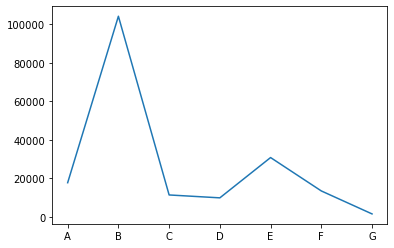

In [10]:
plt.plot(grouped_spend.size())
plt.show()

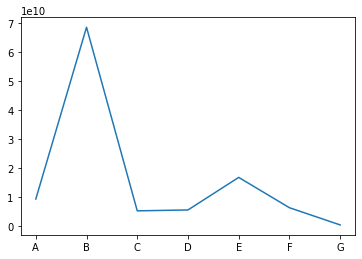

In [11]:
plt.plot(grouped_spend.sum())
plt.show()

In [12]:
data.head(30)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,AREA
0,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00시,1520000,0,8,0,126.178884,33.302766,한경면,A
1,2,3,3,202006,제주특별자치도,제주시,중소1,편의점,00시,482310,0,35,0,126.179458,33.300971,한경면,A
2,3,4,4,202006,제주특별자치도,제주시,영세,편의점,00시,38050,5450,3,1,126.179430,33.302323,한경면,A
3,4,5,5,202006,제주특별자치도,제주시,영세,일반한식,00시,32000,32000,1,1,126.179412,33.303224,한경면,A
4,5,6,6,202006,제주특별자치도,제주시,영세,주점,00시,99000,0,1,0,126.179412,33.303224,한경면,A
5,6,7,7,202006,제주특별자치도,제주시,영세,스넥,00시,155000,80000,4,2,126.181022,33.303248,한경면,A
6,7,8,8,202006,제주특별자치도,제주시,중소1,편의점,00시,290360,1150,28,1,126.182742,33.349702,한경면,A
7,8,9,9,202006,제주특별자치도,제주시,영세,스넥,00시,102000,0,4,0,126.182733,33.350153,한경면,A
8,9,10,10,202006,제주특별자치도,제주시,영세,단란주점,00시,600000,0,3,0,126.183260,33.350611,한경면,A
9,10,11,11,202006,제주특별자치도,제주시,영세,편의점,00시,23520,0,2,0,126.186454,33.352010,한경면,A


## 3. 권역별 주요 사용처 분석

In [13]:
grouped_type = data.groupby(['AREA', 'Type'])
grouped_eachType_spend = grouped_type.sum()["TotalSpent"]
grouped_eachType_spend

AREA  Type  
A     LPG       87497297
      가전제품      38892700
      가정용품수리      187940
      건축요업품      9846400
      견인서비스       274000
                  ...   
G     중국음식      21353000
      침구수예점      2500900
      칵테일바        864300
      편의점       24777740
      한의원         547480
Name: TotalSpent, Length: 912, dtype: int64

In [14]:
A_top_spent = grouped_eachType_spend["A"].sort_values(ascending=False)[0:10]
A_top_spent

Type
일반한식        1571373116
주유소         1060255065
골프경기장        873646498
농축협직영매장      852285486
서양음식         546908585
편의점          513577121
농협하나로클럽      341816620
슈퍼마켓         330855260
유아원          296990090
비료농약사료종자     236123137
Name: TotalSpent, dtype: int64

In [15]:
B_top_spent = grouped_eachType_spend["B"].sort_values(ascending=False)[0:10]
B_top_spent

Type
일반한식    6597010630
면세점     5997918527
슈퍼마켓    5113848118
유아원     3041454270
편의점     2842918369
주유소     2814455818
약국      2360655709
의원      2131835830
종합병원    1951831690
서양음식    1744864513
Name: TotalSpent, dtype: int64

In [16]:
C_top_spent = grouped_eachType_spend["C"].sort_values(ascending=False)[0:10]
C_top_spent

Type
일반한식       1161720390
주유소         505154976
골프경기장       355981750
서양음식        351831450
편의점         299883130
농축협직영매장     270421680
슈퍼마켓        224777769
콘도          158607600
유아원         155226780
농협하나로클럽     117930210
Name: TotalSpent, dtype: int64

In [17]:
D_top_spent = grouped_eachType_spend["D"].sort_values(ascending=False)[0:10]
D_top_spent

Type
일반한식       781045024
골프경기장      569406794
주유소        462710046
콘도         461468790
서양음식       451106530
슈퍼마켓       379164225
농축협직영매장    291025990
편의점        264440060
유아원        134582170
티켓         126568880
Name: TotalSpent, dtype: int64

In [18]:
E_top_spent = grouped_eachType_spend["E"].sort_values(ascending=False)[0:10]
E_top_spent

Type
일반한식       1874332784
슈퍼마켓       1196739361
주유소        1027635992
특급호텔        982657661
대형할인점       944392680
편의점         835183624
유아원         755194620
서양음식        688467546
농축수산품       625226490
농축협직영매장     622825900
Name: TotalSpent, dtype: int64

In [19]:
F_top_spent = grouped_eachType_spend["F"].sort_values(ascending=False)[0:10]
F_top_spent

Type
일반한식       926819797
농축협직영매장    708095504
주유소        454125241
골프경기장      440577985
슈퍼마켓       437840662
콘도         412280788
편의점        323059494
농축수산품      265971017
서양음식       227752030
유아원        187753360
Name: TotalSpent, dtype: int64

In [20]:
G_top_spent = grouped_eachType_spend["G"].sort_values(ascending=False)[0:10]
G_top_spent

Type
일반한식       127737880
서양음식        44245650
편의점         24777740
주유소         24742624
슈퍼마켓        22283740
농축수산품       21482700
중국음식        21353000
스포츠레져용품     18179500
스넥          17740750
렌트카         11345000
Name: TotalSpent, dtype: int64

위 결과를 보면 시외권과 시내권의 특성이 매우 분명하게 드러나고, 기타 지역의 경우에 낚시 등의 레저가 발달한 것을 분명하게 살펴볼 수 있다.